### Data Collection:

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

In [174]:
iris = load_iris()

### Data Exploration:

In [175]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [176]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [177]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [178]:
print("Dataset Structure:")
df.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [179]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [180]:
df['species'] =iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Distribution of Data Points:


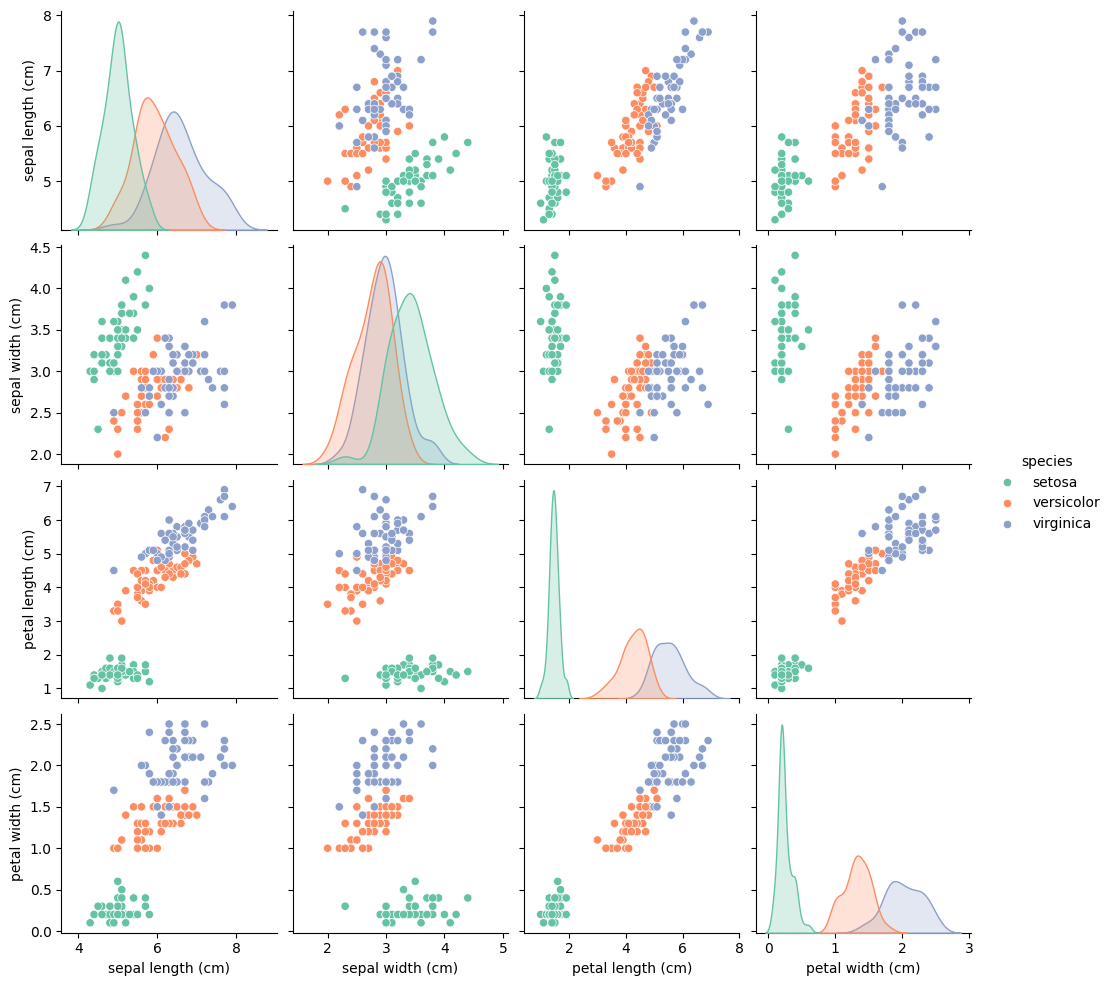

In [181]:
# Distribution of data points for each feature
print("\nDistribution of Data Points:")
sns.pairplot(df, hue='species', palette='Set2')
plt.show()


Relationship between Features and Target Variable:


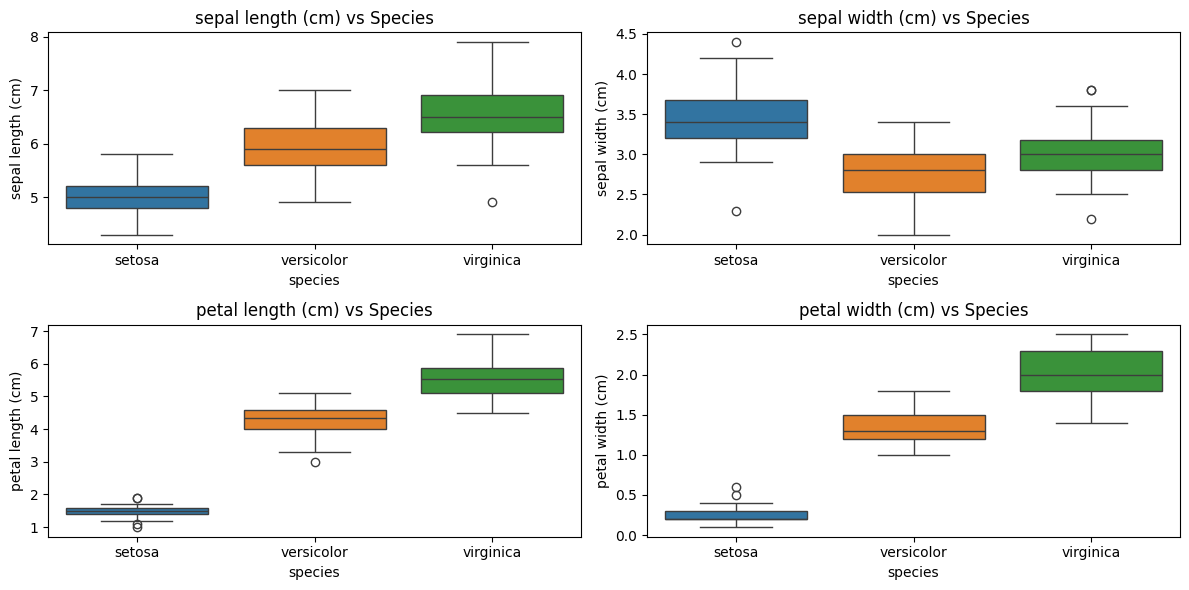

In [182]:
# Relationship between features and target variable
print("\nRelationship between Features and Target Variable:")
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df, hue='species')
    plt.title(f"{feature} vs Species")
plt.tight_layout()
plt.show()


### Data Preprocessing:

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values (if any)
if df.isnull().sum().sum() == 0:
    print("No missing values in the dataset.")
else:
    df.dropna(inplace=True)
    print("Missing values handled.")

No missing values in the dataset.


In [184]:
#Checking if it has any duplicate values
df.duplicated().sum()
     
#Removing the duplicate values
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [185]:
# Encode the categorical target variable (species)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [186]:
X = df.drop('species',axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [187]:
y = df.species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Model Selection:

Creating LR Model and training on train data

In [189]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Model Training:

In [190]:
# Measure accuracy of our model
model.score(X_test, y_test)

1.0

In [191]:
y_predicted = model.predict(X_test)

### Model Evaluation:

In [196]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predicted, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Prediction:

In [197]:
# Prediction (You can create a function or a user interface for this)
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example new data point
# Predict the class for the new data point
prediction = model.predict(sample)

# Map the numerical prediction to the species name
predicted_species = iris.target_names[prediction[0]]

print(f"Predicted class for new data: {predicted_species}")

Predicted class for new data: setosa


### Visualization:

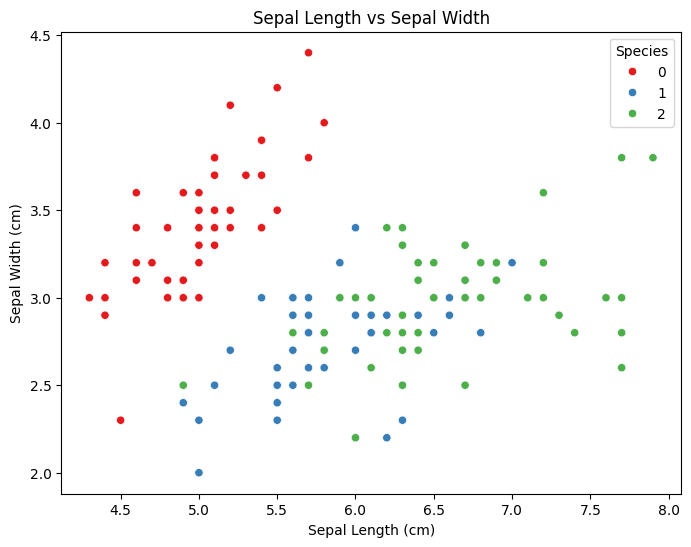

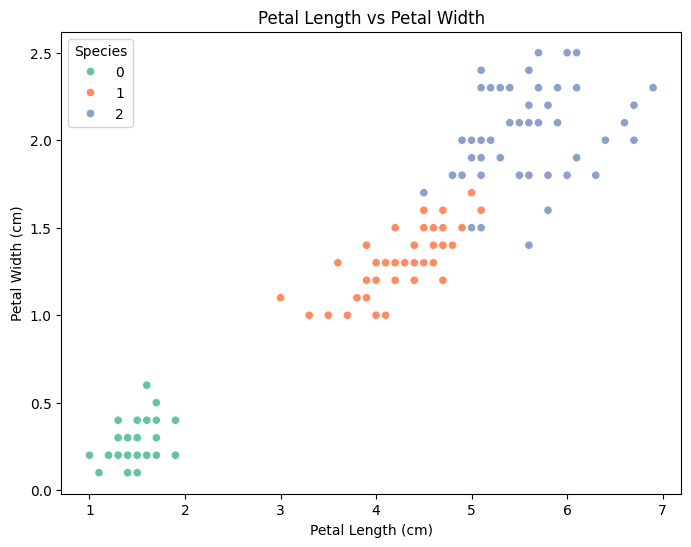

In [202]:
# Scatter plot for Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

# Scatter plot for Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='Set2')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()


Text(95.72222222222221, 0.5, 'Truth')

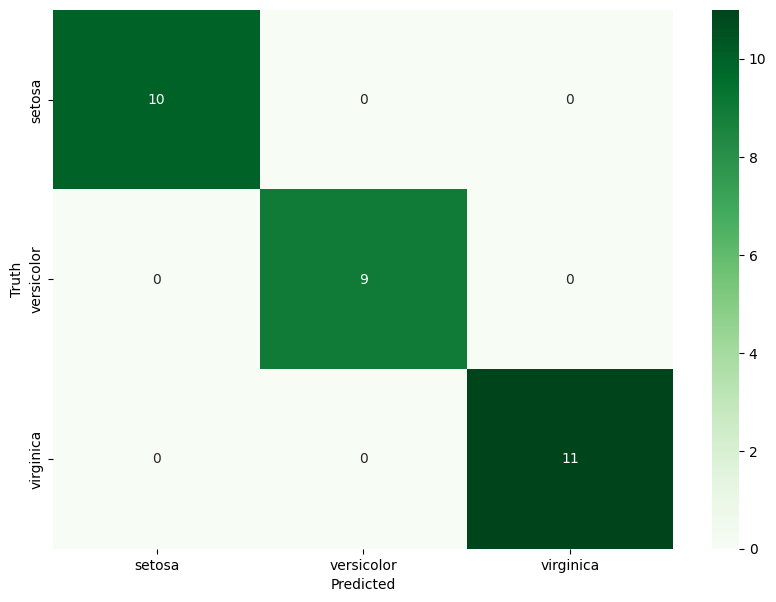

In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Saving the model

In [169]:
import joblib

joblib.dump(model, 'model_iris.pkl')

['model_iris.pkl']

In [171]:
# Load the model from the file
loaded_model = joblib.load('model_iris.pkl')
loaded_model

LogisticRegression()